# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline

In [31]:
df = pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [32]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [33]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zeros = sample_df["column 1"].loc[sample_df["column 2"] == 0]
zeros

0    20
4    65
5    50
Name: column 1, dtype: int64

In [34]:
sample_df20 = sample_df.loc[sample_df["column 1"]<30]
sample_df20.head()

,column 1,column 2
0,20,0
2,15,1
6,10,1


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [35]:
sample_df1 = sample_df["column 1"].loc[sample_df["column 2"] == 1]
sample_df1.head()

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

In [36]:
sample_df50 = sample_df["column 2"].loc[sample_df["column 1"] ==50]
sample_df50.head()

1    1
3    1
5    0
Name: column 2, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [37]:
sample_df50 = sample_df["column 2"].loc[sample_df["column 1"] ==50]
sample_df50.head()

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [38]:
# You will need to import numpy
import numpy as np

In [39]:
new_df = df.loc[df["group_id"]==1]
new_df.head()
len(new_df)

125

In [40]:
# You can use this function in your code to find the log of distance:
new_df["Absolute Magnitude"] = new_df["G"]-5*np.log10(new_df["distance"])+5
new_df.head()

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Absolute Magnitude
151,4215,230386718682382976,TYC 2885-2209-1,60.473140,41.727862,6.5020,155.458,10.276,9.380,NaN,NaN,NaN,1,125,4.317935
152,4381,231698848371132032,HIP 18507,59.357595,43.316188,7.2032,140.343,7.372,7.240,NaN,NaN,NaN,1,125,1.636046
153,4418,231907240183865600,HIP 18640,59.852732,44.481590,6.1964,162.826,7.930,7.642,NaN,NaN,NaN,1,125,1.871381
154,4439,232078592199612416,TYC 2886-2075-1,62.971059,42.749205,6.8740,146.798,8.823,7.987,NaN,NaN,NaN,1,125,2.989399
155,4447,232143188507760128,TYC 2890-2306-1,63.436792,43.566124,6.5555,154.674,10.054,9.090,NaN,NaN,NaN,1,125,4.106913


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

Text(0, 0.5, 'Absolute Magnitude')

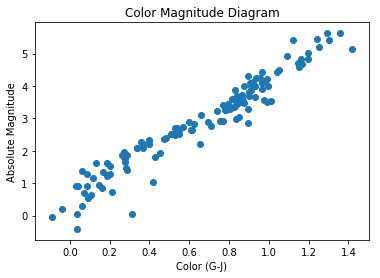

In [41]:
plt.scatter((new_df["G"] - new_df["J"]), new_df["Absolute Magnitude"])
plt.title("Color Magnitude Diagram")
plt.xlabel("Color (G-J)")
plt.ylabel("Absolute Magnitude")

In [42]:
new_df["Color"] = new_df["G"]-new_df["J"]
new_df.head(5)

/Users/brownscholar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,Absolute Magnitude,Color
151,4215,230386718682382976,TYC 2885-2209-1,60.473140,41.727862,6.5020,155.458,10.276,9.380,NaN,NaN,NaN,1,125,4.317935,0.896
152,4381,231698848371132032,HIP 18507,59.357595,43.316188,7.2032,140.343,7.372,7.240,NaN,NaN,NaN,1,125,1.636046,0.132
153,4418,231907240183865600,HIP 18640,59.852732,44.481590,6.1964,162.826,7.930,7.642,NaN,NaN,NaN,1,125,1.871381,0.288
154,4439,232078592199612416,TYC 2886-2075-1,62.971059,42.749205,6.8740,146.798,8.823,7.987,NaN,NaN,NaN,1,125,2.989399,0.836
155,4447,232143188507760128,TYC 2890-2306-1,63.436792,43.566124,6.5555,154.674,10.054,9.090,NaN,NaN,NaN,1,125,4.106913,0.964


In [43]:
C = new_df["Color"]
AM = new_df["Absolute Magnitude"]

In [44]:
SunJ = 3.64
SunG = 5.12

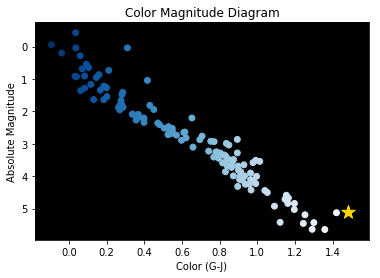

In [46]:
cm = plt.cm.get_cmap("Blues_r")
plt.scatter(new_df["G"]- new_df["J"], new_df["Absolute Magnitude"],c=C, s=35, cmap=cm)
plt.scatter(SunG-SunJ,SunG, c='gold', s=200, marker='*')
plt.xlabel("Color (G-J)")
plt.ylabel("Absolute Magnitude")
plt.title("Color Magnitude Diagram")
plt.gca().invert_yaxis()
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

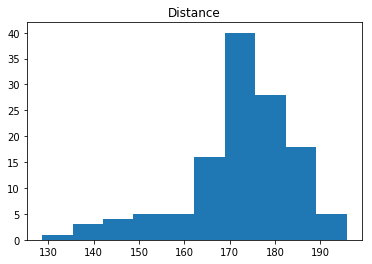

In [29]:
plt.hist(new_df["distance"], 10)
plt.title(("Distance"))
plt.show()